# Identification of clusters in the Iris Dataset

Herein we will be using naive bayes model for prediction and k-means clustering to identify the numbers of clusters

In [5]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [49]:
#Loading our Iris Dataset
iris1=datasets.load_iris()
iris1_df=pd.read_csv(r"C:\Users\ANKIT\Downloads\Iris.csv")
iris_df = pd.DataFrame(iris1.data, columns = iris1.feature_names)
iris1_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
data=iris_df.iloc[:,[0,1,2,3]].values
y=iris1_df['Species'].values

In [23]:
from sklearn.cluster import KMeans
wcss=[]

Now we will take i number of clusters and our n_init is the number of runs of the program and max_iter is the iterations per run.
kmeans.inertia_ gives the best values among n consecutive values

In [24]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


# The Elbow Method

The elbow method helps to choose the optimum value of ‘k’ (number of clusters) by fitting the model with a range of values of ‘k’. Here we would be using a 2-dimensional data set but the elbow method holds for any multivariate data set.

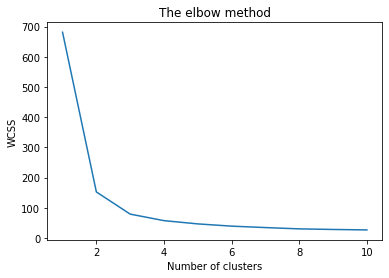

In [25]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Here we can observe that the optimum number of clusters for our program is 3

In [28]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(data)

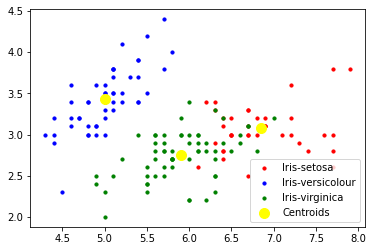

In [31]:
# Visualising the clusters - On the first two columns
plt.scatter(data[y_means == 0, 0], data[y_means == 0, 1], 
            s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(data[y_means == 1, 0], data[y_means == 1, 1], 
            s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data[y_means == 2, 0], data[y_means == 2, 1],
            s = 10, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Machine-Learning

In [52]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(data, y, 
                            test_size=0.2, random_state=0) 

Now we will make a naive-bayes model to classify into different classes

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.9666666666666667

Here we came to the conclusion that our model is able to classify the three classses with an accuracy of 96%

In [58]:
nvclassifier.score(X_train,y_train)

0.95

Confusion matrix to identify true positives,true negatives,false positives,false negatives

In [60]:
confusion_matrix(y_pred,y_test)

array([[11,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  5]], dtype=int64)

In [62]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.98      0.96        30
   weighted avg       0.97      0.97      0.97        30

